<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

<h4 align='left'> Integrantes: </h4>
<p align='left'> Alfredo Silva Celpa 201373511-8 </p>
<p align='left'> Margarita Bugueño Pérez 201373510-k </p>
<hr style="height:2px;border:none"/>


**Temas**  
* Entrenamiento de redes *Feed-Forward* vı́a GD y variantes (SGD, mini-*batches*), *momentum*, regularización y tasa de aprendizaje adaptiva.
* Evaluación de redes *Feed-Forward* vı́a validación cruzada (cross-validation).
* Rol de capas ocultas y mayor profundidad (*Deep Learning*).
* Identificar el gradiente desvaneciente.
* Diseño y entrenamiento de Redes Convolucionales (CNNs).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 04 Abril
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea1-INF395-I-2018]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Predicción del precio de una Casa  
[2.](#segundo) *Deep Networks*  
[3.](#tercero) Convolutional Neural Network (CNN) en CIFAR.  
[4.](#cuarto) Aplicación de una red neuronal en Localización

<a id="cuarto"></a>
## 4. Aplicación de una red neuronal en Localización
Desde la edad antigua, múltiples formas de localización han sido desarrolladas. Dentro de los avances más importantes en este ámbito, es el desarrollo de la teorı́a cientı́fica y técnica denominada georreferenciación. Gracias a GPS, el crecimiento y acceso de la georreferenciación y navegación está en progresivo aumento, el problema surge cuando se intentan estimar en recintos interiores (como edificios o bajo tierra) donde el GPS no funciona de la manera como uno esperaría, debido a que existen muchos obstáculos e interferencia que imposibilitan su uso.  
Dentro de interiores se cuenta con señales RSSI (*fingerprint*) que pueden atacar este problema, sin embargo los métodos actuales no son robustos a ruido, por lo que su tarea será la de abordar este problema para mejorar exactitud de sistemas de posicionamiento en interiores mediante redes neuronales.  

La metodología con la que se trabajará será que, para dentro de interiores, dispositivos *Bluetooth* emiten señales RSSI las cuales son captadas por el dispositivo "objetivo" al cual se le desea determinar su localización, recibiendo distintas intensidades de señal de cada dispositivo emisor debido a su posición en el interior. Los datos con los que se va a trabajar (*IndoorFingerprint.csv*) fueron provistos por el nuevo Ing. Civil Informático Felipe Berrios, éstos constan de 8 características (*C1hA,0kxZ,tvMX,OlYb,7rk5,F39L,VNSF,tkxI*) correspondientes a las mediciones hechas/recibidas por el dispositivo "objetivo" de las distintas señales RSSI emitidas por los dispositivos *Bluetooth* en los bordes del interior, además de tener la posición del dispositivo "objetivo" en un plano XY (valor a estimar).

<img src="https://i.imgur.com/Xheipaa.png" width="60%" height="20%" />

Grilla ejemplo de cómo funciona el sistema (elaboración por Felipe Berrios). Los 4 dispositivos en la esquina son los que emiten las señales RSSI, el punto naranja es el dispositivo que las recibe y es el "objetivo" a determinar la posición.

Una consideración importante es el cómo tratar la ausencia de la señal proveniente de un dispositivo *Bluetooth*, para estos datos se utiliza un valor de +100, ya que es imposible obtener este valor debido a las características de la escala RSSI (siempre negativa o igual a cero), pero puede ser sustituido por otro.  
Para hacer el trabajo mas simple se discretizará la posición en el plano definiendo zonas en dónde está el objeto a localizar. Las zonas deben ser las que indica la malla a continuación:

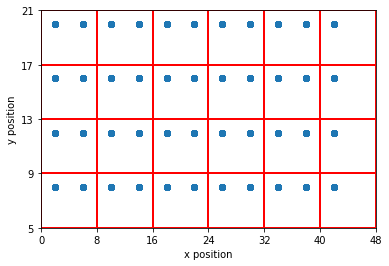

In [77]:
import pandas as pd
import numpy as np

df = pd.read_csv("./IndoorFingerprint.csv")

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df["X"],df["Y"])

x_ticks = np.arange(0, 49, 8)
y_ticks = np.arange(5, 22, 4)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid(color='r', linestyle='-', linewidth=2)
plt.ylabel("y position")
plt.xlabel("x position")
plt.show()

Donde los puntos azules son los distintos datos superpuestos de las posiciones del objeto a localizar. Por ejemplo el punto (2,8) está en la primera zona (o en la primera zona del eje *x* y del eje *y*), el punto (2,20) está en la zona 19 (o en la primera zona del eje *x* y la cuarta zona del eje *y*). Esta discretización transforma el problema que en un principio podría ser de regresión para determinar la posición exacta, en un problema de clasificación dividiendo (dentro de los posibles valores) 6 zonas para el eje "*x*" y 4 zonas para el eje "*y*", contando con un total de 24 clases (24 zonas en la malla).

> Deberá entrenar una red neuronal *feed forward* para la clasificación de las 24 posibles clases, con el objetivo de tener un desempeño (*accuracy*) mayor al 75%.
#### Importante
El conjunto de pruebas está **fijado** a través de los indices de posiciones del dataset, por lo que deberá leer estos indices y crear el conjunto de pruebas a partir de éstos.
```python
mask_test = np.loadtxt('mask_test.csv',dtype="i")
X_test = X[mask_test]
X_train = np.delete(X,mask_test,axis=0)
```
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con los modelos</div>

In [78]:
df.head()

,X,Y,C1hA,0kxZ,tvMX,OlYb,7rk5,F39L,VNSF,tkxI
0,2.0,8.0,-66,-92,-84,-84,-92,-93,-98,-96
1,2.0,8.0,-66,-94,-84,-84,-94,-93,-98,-96
2,2.0,8.0,-66,-94,-84,-84,-94,-93,-98,-100
3,2.0,8.0,-66,-94,-84,-84,-94,-80,-98,-100
4,2.0,8.0,-66,-94,-84,-84,-94,-74,-98,-100


In [79]:
def to_celda(X,Y):
    horizontal= np.ceil(X/8)
    vertical=np.ceil(Y/4)-1
    hor,vert= [np.int(horizontal),np.int(vertical)]
    return hor+6*(vert-1)    

celda=[]
for i,j in zip(df['X'],df['Y']):
    celda.append(to_celda(i,j))

df['Celda']= pd.DataFrame(celda)
df.shape

(6600, 11)

In [80]:
df.describe()

,X,Y,C1hA,0kxZ,tvMX,OlYb,7rk5,F39L,VNSF,tkxI,Celda
count,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000
mean,22.000000,14.000000,-71.152121,-85.025909,-89.734545,-77.810758,-90.219091,-80.133030,-89.091515,-89.195455,12.272727
std,12.650069,4.472475,61.117550,38.743163,7.763426,43.540421,9.230207,7.715085,7.296616,9.508659,6.897042
min,2.000000,8.000000,-105.000000,-104.000000,-107.000000,-103.000000,-105.000000,-102.000000,-102.000000,-105.000000,1.000000
25%,10.000000,11.000000,-98.000000,-97.000000,-96.000000,-96.000000,-96.000000,-86.000000,-95.000000,-96.000000,6.750000
50%,22.000000,14.000000,-93.000000,-94.000000,-92.000000,-87.000000,-91.000000,-80.000000,-90.000000,-90.500000,12.500000
75%,34.000000,17.000000,-86.000000,-90.000000,-84.000000,-80.000000,-86.000000,-75.000000,-85.000000,-84.000000,18.250000
max,42.000000,20.000000,100.000000,100.000000,-65.000000,100.000000,100.000000,-57.000000,-60.000000,100.000000,24.000000


In [81]:
#division del dataset 
import numpy as np 
mask_test = np.loadtxt('mask_test.csv',dtype="i")
X_test = df.iloc[mask_test].copy()
indexes= set(df.index)-set(mask_test)#indexes
X_train=df.iloc[list(indexes)]

print ("Dimensiones del dataframe de entrenamiento",X_train.shape)
print ("Dimensiones del dataframe de prueba",X_test.shape)

Dimensiones del dataframe de entrenamiento (4620, 11)
Dimensiones del dataframe de prueba (1980, 11)


In [82]:
X_train.describe()

,X,Y,C1hA,0kxZ,tvMX,OlYb,7rk5,F39L,VNSF,tkxI,Celda
count,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000
mean,22.012987,13.984416,-70.615584,-84.872727,-89.784632,-77.811039,-90.124242,-80.142208,-89.091342,-89.176190,12.253247
std,12.662652,4.460184,61.678954,39.034907,7.710511,43.516563,9.584332,7.687239,7.304846,9.799247,6.873201
min,2.000000,8.000000,-105.000000,-104.000000,-107.000000,-103.000000,-105.000000,-102.000000,-102.000000,-105.000000,1.000000
25%,10.000000,12.000000,-98.000000,-97.000000,-96.000000,-96.000000,-96.000000,-86.000000,-95.000000,-96.000000,7.000000
50%,22.000000,12.000000,-93.000000,-94.000000,-92.000000,-87.000000,-91.000000,-80.000000,-90.000000,-91.000000,12.000000
75%,34.000000,16.000000,-86.000000,-89.000000,-84.000000,-80.000000,-86.000000,-75.000000,-84.000000,-83.000000,18.000000
max,42.000000,20.000000,100.000000,100.000000,-65.000000,100.000000,100.000000,-57.000000,-60.000000,100.000000,24.000000


In [83]:
X_train.head()

,X,Y,C1hA,0kxZ,tvMX,OlYb,7rk5,F39L,VNSF,tkxI,Celda
0,2.0,8.0,-66,-92,-84,-84,-92,-93,-98,-96,1
1,2.0,8.0,-66,-94,-84,-84,-94,-93,-98,-96,1
2,2.0,8.0,-66,-94,-84,-84,-94,-93,-98,-100,1
3,2.0,8.0,-66,-94,-84,-84,-94,-80,-98,-100,1
5,2.0,8.0,-66,-94,-84,-84,-92,-74,-98,-100,1


In [84]:
X_train=X_train.sample(frac=1)
X_train.head()

,X,Y,C1hA,0kxZ,tvMX,OlYb,7rk5,F39L,VNSF,tkxI,Celda
2502,22.0,12.0,-94,-91,-94,-86,-90,-76,-80,-87,9
1763,42.0,12.0,-100,100,-90,100,-93,-78,-85,-77,12
2110,30.0,12.0,-100,-103,-92,-95,-87,-72,-86,-92,10
1943,38.0,12.0,-100,-99,-94,-100,-90,-78,-82,-78,11
2345,26.0,12.0,-90,-95,-80,-82,-86,-73,-83,-84,10


Text(0.5,1,'tkxI')

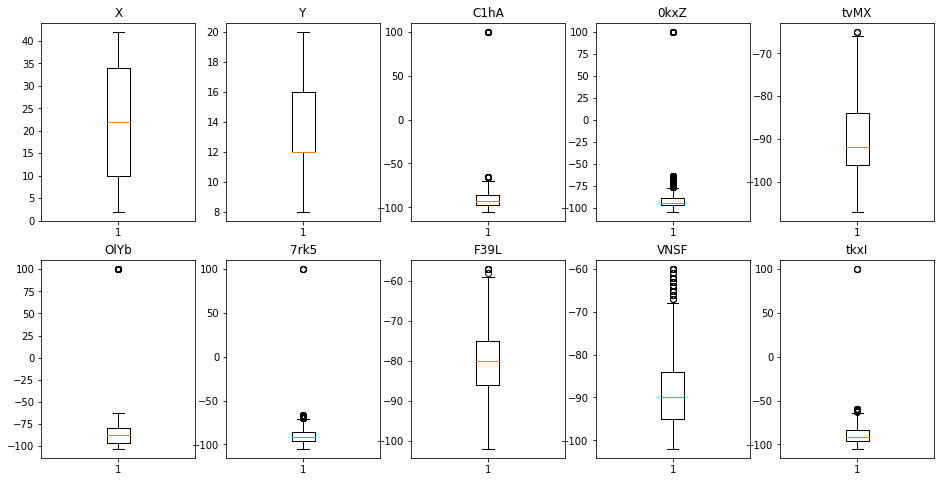

In [85]:
A,B=plt.subplots(2,5,figsize=(16,8))
B[0,0].boxplot(X_train['X'])
B[0,0].set_title("X")
B[0,1].boxplot(X_train['Y'])
B[0,1].set_title("Y")
B[0,2].boxplot(X_train['C1hA'])
B[0,2].set_title("C1hA")
B[0,3].boxplot(X_train['0kxZ'])
B[0,3].set_title("0kxZ")
B[0,4].boxplot(X_train['tvMX'])
B[0,4].set_title("tvMX")
B[1,0].boxplot(X_train['OlYb'])
B[1,0].set_title("OlYb")
B[1,1].boxplot(X_train['7rk5'])
B[1,1].set_title("7rk5")
B[1,2].boxplot(X_train['F39L'])
B[1,2].set_title("F39L")
B[1,3].boxplot(X_train['VNSF'])
B[1,3].set_title("VNSF")
B[1,4].boxplot(X_train['tkxI'])
B[1,4].set_title("tkxI")


In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
y_train = X_train['Celda'].values.reshape(-1,1)

X_test_scaled =  pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
y_test = X_test['Celda'].values.reshape(-1,1)

In [87]:
X_train_scaled.describe()

,X,Y,C1hA,0kxZ,tvMX,OlYb,7rk5,F39L,VNSF,tkxI,Celda
count,4.620000e+03,4.620000e+03,4.620000e+03,4.620000e+03,4.620000e+03,4.620000e+03,4.620000e+03,4.620000e+03,4.620000e+03,4.620000e+03,4.620000e+03
mean,1.414934e-16,-4.537015e-17,6.421030e-17,7.074668e-17,6.490239e-16,-2.614551e-17,6.382581e-17,8.612639e-16,1.115029e-17,-6.059607e-16,6.997769e-17
std,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00
min,-1.580645e+00,-1.341887e+00,-5.575344e-01,-4.900573e-01,-2.232956e+00,-5.788988e-01,-1.552259e+00,-2.843694e+00,-1.767327e+00,-1.614973e+00,-1.637441e+00
25%,-9.487971e-01,-4.449660e-01,-4.440312e-01,-3.107113e-01,-8.061775e-01,-4.180231e-01,-6.131250e-01,-7.620975e-01,-8.089558e-01,-6.964360e-01,-7.643913e-01
50%,-1.025727e-03,-4.449660e-01,-3.629575e-01,-2.338487e-01,-2.873490e-01,-2.111829e-01,-9.138377e-02,1.850120e-02,-1.244046e-01,-1.861375e-01,-3.684952e-02
75%,9.467456e-01,4.519550e-01,-2.494543e-01,-1.057443e-01,7.503080e-01,-5.030724e-02,4.303575e-01,6.690002e-01,6.970568e-01,6.303402e-01,8.362006e-01
max,1.578593e+00,1.348876e+00,2.766487e+00,4.736600e+00,3.214743e+00,4.086497e+00,1.983913e+01,3.010796e+00,3.982902e+00,1.930727e+01,1.709251e+00


In [88]:
#shuflear??? tendrá efecto en la red? 
#Probaaaaaaarrrrr

Text(0.5,1,'tkxI')

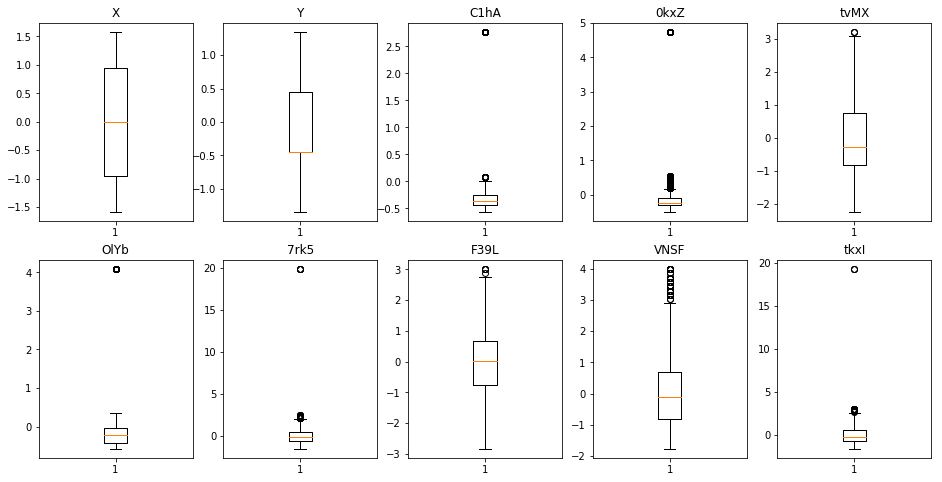

In [89]:
A,B=plt.subplots(2,5,figsize=(16,8))
B[0,0].boxplot(X_train_scaled['X'])
B[0,0].set_title("X")
B[0,1].boxplot(X_train_scaled['Y'])
B[0,1].set_title("Y")
B[0,2].boxplot(X_train_scaled['C1hA'])
B[0,2].set_title("C1hA")
B[0,3].boxplot(X_train_scaled['0kxZ'])
B[0,3].set_title("0kxZ")
B[0,4].boxplot(X_train_scaled['tvMX'])
B[0,4].set_title("tvMX")
B[1,0].boxplot(X_train_scaled['OlYb'])
B[1,0].set_title("OlYb")
B[1,1].boxplot(X_train_scaled['7rk5'])
B[1,1].set_title("7rk5")
B[1,2].boxplot(X_train_scaled['F39L'])
B[1,2].set_title("F39L")
B[1,3].boxplot(X_train_scaled['VNSF'])
B[1,3].set_title("VNSF")
B[1,4].boxplot(X_train_scaled['tkxI'])
B[1,4].set_title("tkxI")

In [90]:
#cosas escaladas :) comentarlo

In [91]:
print ("Dimensiones del dataframe de entrenamiento:",X_train_scaled.shape)
print ("Dimensiones del dataframe de pruebas:",X_test_scaled.shape)

Dimensiones del dataframe de entrenamiento: (4620, 11)
Dimensiones del dataframe de pruebas: (1980, 11)


In [95]:
X_train_scaled2=pd.DataFrame(X_train_scaled, columns=['C1hA','0kxZ','tvMX','OlYb','7rk5','F39L','VNSF','tkxI','Celda'])
X_test_scaled2=pd.DataFrame(X_test_scaled, columns=['C1hA','0kxZ','tvMX','OlYb','7rk5','F39L','VNSF','tkxI','Celda'])

In [96]:
print ("Dimensiones del dataframe de entrenamiento:",X_train_scaled2.shape)
print ("Dimensiones del dataframe de pruebas:",X_test_scaled2.shape)

Dimensiones del dataframe de entrenamiento: (4620, 9)
Dimensiones del dataframe de pruebas: (1980, 9)


In [98]:
#agregar columna celda a train y val (target)
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
y_onehot = keras.utils.to_categorical(y_train)
y_onehot= y_onehot[:,1:]
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled2.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(16, kernel_initializer='uniform',activation="relu"))
model.add(Dense(24, kernel_initializer='uniform',activation="softmax")) 
model.compile(optimizer=SGD(lr=0.01),loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(X_train_scaled2, y_onehot, batch_size=20, epochs=200,verbose=1,validation_split=0.2)#, validation_data=(X_test_scaled, y_test))

Train on 3696 samples, validate on 924 samples
Epoch 1/200
3696/3696 [==============================] - 3s 871us/step - loss: 3.1766 - acc: 0.0290 - val_loss: 3.1753 - val_acc: 0.0639
Epoch 2/200
3696/3696 [==============================] - 1s 260us/step - loss: 3.1734 - acc: 0.0630 - val_loss: 3.1730 - val_acc: 0.0433
Epoch 3/200
3696/3696 [==============================] - 1s 261us/step - loss: 3.1707 - acc: 0.0498 - val_loss: 3.1709 - val_acc: 0.0433
Epoch 4/200
3696/3696 [==============================] - 1s 258us/step - loss: 3.1683 - acc: 0.0525 - val_loss: 3.1692 - val_acc: 0.0433
Epoch 5/200
3696/3696 [==============================] - 1s 256us/step - loss: 3.1663 - acc: 0.0528 - val_loss: 3.1677 - val_acc: 0.0433
Epoch 6/200
3696/3696 [==============================] - 1s 260us/step - loss: 3.1644 - acc: 0.0541 - val_loss: 3.1664 - val_acc: 0.0433
Epoch 7/200
3696/3696 [==============================] - 1s 263us/step - loss: 3.1628 - acc: 0.0511 - val_loss: 3.1653 - val_acc: 0

3696/3696 [==============================] - 1s 260us/step - loss: 0.5362 - acc: 0.8268 - val_loss: 0.5489 - val_acc: 0.8366
Epoch 61/200
3696/3696 [==============================] - 1s 257us/step - loss: 0.5162 - acc: 0.8333 - val_loss: 0.5048 - val_acc: 0.8506
Epoch 62/200
3696/3696 [==============================] - 1s 256us/step - loss: 0.4924 - acc: 0.8409 - val_loss: 0.4872 - val_acc: 0.8561
Epoch 63/200
3696/3696 [==============================] - 1s 275us/step - loss: 0.4762 - acc: 0.8490 - val_loss: 0.4674 - val_acc: 0.8593
Epoch 64/200
3696/3696 [==============================] - 1s 257us/step - loss: 0.4595 - acc: 0.8577 - val_loss: 0.4604 - val_acc: 0.8766
Epoch 65/200
3696/3696 [==============================] - 1s 278us/step - loss: 0.4404 - acc: 0.8631 - val_loss: 0.4572 - val_acc: 0.8615
Epoch 66/200
3696/3696 [==============================] - 1s 264us/step - loss: 0.4290 - acc: 0.8669 - val_loss: 0.4315 - val_acc: 0.8799
Epoch 67/200
3696/3696 [=======================

3696/3696 [==============================] - 1s 256us/step - loss: 0.2119 - acc: 0.9272 - val_loss: 0.2320 - val_acc: 0.9264
Epoch 120/200
3696/3696 [==============================] - 1s 250us/step - loss: 0.2126 - acc: 0.9286 - val_loss: 0.2082 - val_acc: 0.9437
Epoch 121/200
3696/3696 [==============================] - 1s 255us/step - loss: 0.2080 - acc: 0.9280 - val_loss: 0.2183 - val_acc: 0.9361
Epoch 122/200
3696/3696 [==============================] - 1s 252us/step - loss: 0.2120 - acc: 0.9297 - val_loss: 0.2137 - val_acc: 0.9351
Epoch 123/200
3696/3696 [==============================] - 1s 255us/step - loss: 0.2074 - acc: 0.9310 - val_loss: 0.2083 - val_acc: 0.9394
Epoch 124/200
3696/3696 [==============================] - 1s 259us/step - loss: 0.2023 - acc: 0.9310 - val_loss: 0.2007 - val_acc: 0.9448
Epoch 125/200
3696/3696 [==============================] - 1s 260us/step - loss: 0.2017 - acc: 0.9364 - val_loss: 0.2166 - val_acc: 0.9329
Epoch 126/200
3696/3696 [================

3696/3696 [==============================] - 1s 295us/step - loss: 0.1302 - acc: 0.9670 - val_loss: 0.1657 - val_acc: 0.9502
Epoch 179/200
3696/3696 [==============================] - 1s 279us/step - loss: 0.1314 - acc: 0.9654 - val_loss: 0.1408 - val_acc: 0.9665
Epoch 180/200
3696/3696 [==============================] - 1s 297us/step - loss: 0.1306 - acc: 0.9635 - val_loss: 0.1594 - val_acc: 0.9535
Epoch 181/200
3696/3696 [==============================] - 1s 294us/step - loss: 0.1307 - acc: 0.9651 - val_loss: 0.1491 - val_acc: 0.9556
Epoch 182/200
3696/3696 [==============================] - 1s 303us/step - loss: 0.1282 - acc: 0.9640 - val_loss: 0.1577 - val_acc: 0.9535
Epoch 183/200
3696/3696 [==============================] - 1s 290us/step - loss: 0.1317 - acc: 0.9646 - val_loss: 0.1399 - val_acc: 0.9610
Epoch 184/200
3696/3696 [==============================] - 1s 258us/step - loss: 0.1251 - acc: 0.9678 - val_loss: 0.1423 - val_acc: 0.9600
Epoch 185/200
3696/3696 [================

dict_keys(['acc', 'loss', 'val_loss', 'val_acc'])


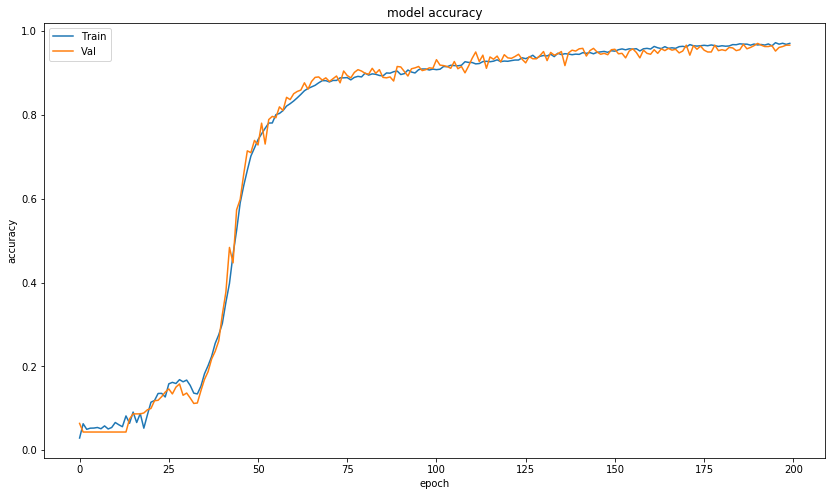

In [99]:
print(history.history.keys())


import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,8))
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Val')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [100]:
import keras
from keras.regularizers import *
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, Adam
y_onehot = keras.utils.to_categorical(y_train)
y_onehot= y_onehot[:,1:]
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled2.shape[1], kernel_initializer='uniform', W_regularizer=l1(0.0001),activation="relu"))
model.add(Dense(16, kernel_initializer='uniform',activation="relu"))
model.add(Dense(24, kernel_initializer='uniform', W_regularizer=l1(0.001),activation="softmax")) 
model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(X_train_scaled2, y_onehot, batch_size=20, epochs=200,verbose=1,validation_split=0.2)#, validation_data=(X_test_scaled, y_test))

/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="uniform", kernel_regularizer=<keras.reg..., input_dim=9)`
/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(24, activation="softmax", kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


Train on 3696 samples, validate on 924 samples
Epoch 1/200
3696/3696 [==============================] - 4s 1ms/step - loss: 1.8250 - acc: 0.3975 - val_loss: 0.8408 - val_acc: 0.7641
Epoch 2/200
3696/3696 [==============================] - 1s 329us/step - loss: 0.6279 - acc: 0.8003 - val_loss: 0.4606 - val_acc: 0.8734
Epoch 3/200
3696/3696 [==============================] - 1s 332us/step - loss: 0.4392 - acc: 0.8750 - val_loss: 0.3957 - val_acc: 0.8907
Epoch 4/200
3696/3696 [==============================] - 1s 325us/step - loss: 0.4032 - acc: 0.8983 - val_loss: 0.3321 - val_acc: 0.9134
Epoch 5/200
3696/3696 [==============================] - 1s 327us/step - loss: 0.3494 - acc: 0.9129 - val_loss: 0.2893 - val_acc: 0.9448
Epoch 6/200
3696/3696 [==============================] - 1s 324us/step - loss: 0.3131 - acc: 0.9318 - val_loss: 0.2750 - val_acc: 0.9654
Epoch 7/200
3696/3696 [==============================] - 1s 335us/step - loss: 0.2950 - acc: 0.9372 - val_loss: 0.3034 - val_acc: 0.9

3696/3696 [==============================] - 1s 326us/step - loss: 0.1965 - acc: 0.9759 - val_loss: 0.1783 - val_acc: 0.9816
Epoch 61/200
3696/3696 [==============================] - 1s 327us/step - loss: 0.1588 - acc: 0.9859 - val_loss: 0.1979 - val_acc: 0.9816
Epoch 62/200
3696/3696 [==============================] - 1s 326us/step - loss: 0.1566 - acc: 0.9830 - val_loss: 0.1914 - val_acc: 0.9773
Epoch 63/200
3696/3696 [==============================] - 1s 328us/step - loss: 0.1644 - acc: 0.9851 - val_loss: 0.1869 - val_acc: 0.9859
Epoch 64/200
3696/3696 [==============================] - 1s 323us/step - loss: 0.1644 - acc: 0.9832 - val_loss: 0.1658 - val_acc: 0.9870
Epoch 65/200
3696/3696 [==============================] - 1s 333us/step - loss: 0.1403 - acc: 0.9894 - val_loss: 0.1661 - val_acc: 0.9892
Epoch 66/200
3696/3696 [==============================] - 1s 331us/step - loss: 0.1551 - acc: 0.9867 - val_loss: 0.2273 - val_acc: 0.9719
Epoch 67/200
3696/3696 [=======================

3696/3696 [==============================] - 1s 332us/step - loss: 0.1220 - acc: 0.9916 - val_loss: 0.2140 - val_acc: 0.9773
Epoch 120/200
3696/3696 [==============================] - 1s 322us/step - loss: 0.1446 - acc: 0.9865 - val_loss: 0.1482 - val_acc: 0.9924
Epoch 121/200
3696/3696 [==============================] - 1s 327us/step - loss: 0.1238 - acc: 0.9922 - val_loss: 0.1515 - val_acc: 0.9859
Epoch 122/200
3696/3696 [==============================] - 1s 324us/step - loss: 0.1305 - acc: 0.9900 - val_loss: 0.1681 - val_acc: 0.9870
Epoch 123/200
3696/3696 [==============================] - 1s 325us/step - loss: 0.1138 - acc: 0.9951 - val_loss: 0.1592 - val_acc: 0.9881
Epoch 124/200
3696/3696 [==============================] - 1s 327us/step - loss: 0.1555 - acc: 0.9854 - val_loss: 0.2087 - val_acc: 0.9838
Epoch 125/200
3696/3696 [==============================] - 1s 329us/step - loss: 0.1611 - acc: 0.9792 - val_loss: 0.2238 - val_acc: 0.9794
Epoch 126/200
3696/3696 [================

3696/3696 [==============================] - 1s 349us/step - loss: 0.4657 - acc: 0.9656 - val_loss: 0.6639 - val_acc: 0.9513
Epoch 179/200
3696/3696 [==============================] - 1s 336us/step - loss: 0.4464 - acc: 0.9710 - val_loss: 0.6159 - val_acc: 0.9567
Epoch 180/200
3696/3696 [==============================] - 1s 328us/step - loss: 0.4262 - acc: 0.9765 - val_loss: 0.6058 - val_acc: 0.9610
Epoch 181/200
3696/3696 [==============================] - 1s 356us/step - loss: 0.4210 - acc: 0.9778 - val_loss: 0.6057 - val_acc: 0.9632
Epoch 182/200
3696/3696 [==============================] - 1s 337us/step - loss: 0.4170 - acc: 0.9784 - val_loss: 0.5928 - val_acc: 0.9621
Epoch 183/200
3696/3696 [==============================] - 1s 325us/step - loss: 0.4486 - acc: 0.9673 - val_loss: 0.6117 - val_acc: 0.9567
Epoch 184/200
3696/3696 [==============================] - 1s 319us/step - loss: 0.5218 - acc: 0.9529 - val_loss: 0.6952 - val_acc: 0.9297
Epoch 185/200
3696/3696 [================

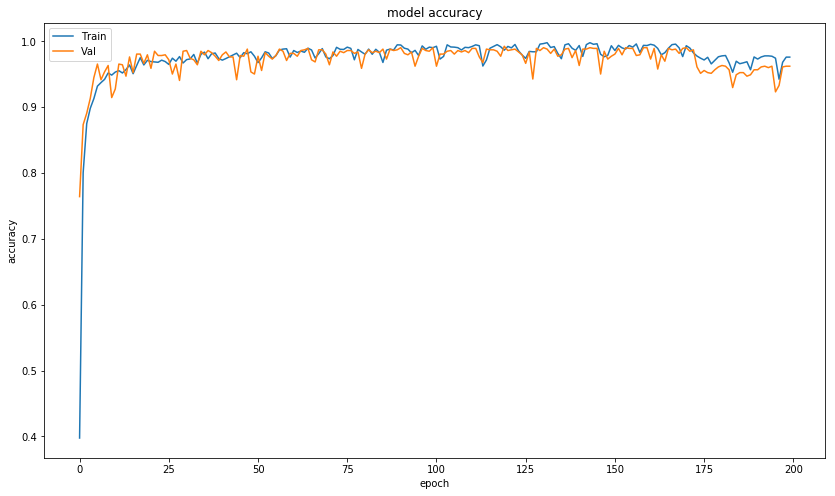

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,8))
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Val')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [102]:
import keras
from keras.regularizers import *
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout
from keras.optimizers import SGD, Adam

y_onehot = keras.utils.to_categorical(y_train)
y_onehot= y_onehot[:,1:]
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled2.shape[1], kernel_initializer='glorot_uniform', W_regularizer=l1(0.0001),activation="relu"))
model.add(Dense(16, kernel_initializer='glorot_uniform',activation="relu"))
model.add(Dropout(0.001))
model.add(Dense(24, kernel_initializer='glorot_uniform', W_regularizer=l1(0.001),activation="softmax")) 
model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(X_train_scaled2, y_onehot, batch_size=20, epochs=200,verbose=1,validation_split=0.2)

/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="glorot_uniform", kernel_regularizer=<keras.reg..., input_dim=9)`
/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(24, activation="softmax", kernel_initializer="glorot_uniform", kernel_regularizer=<keras.reg...)`


Train on 3696 samples, validate on 924 samples
Epoch 1/200
3696/3696 [==============================] - 4s 1ms/step - loss: 1.1912 - acc: 0.6786 - val_loss: 0.5914 - val_acc: 0.8539
Epoch 2/200
3696/3696 [==============================] - 1s 363us/step - loss: 0.4777 - acc: 0.8869 - val_loss: 0.4525 - val_acc: 0.9048
Epoch 3/200
3696/3696 [==============================] - 1s 356us/step - loss: 0.3588 - acc: 0.9294 - val_loss: 0.3933 - val_acc: 0.9167
Epoch 4/200
3696/3696 [==============================] - 1s 371us/step - loss: 0.3182 - acc: 0.9453 - val_loss: 0.2811 - val_acc: 0.9643
Epoch 5/200
3696/3696 [==============================] - 1s 378us/step - loss: 0.3016 - acc: 0.9459 - val_loss: 0.2933 - val_acc: 0.9556
Epoch 6/200
3696/3696 [==============================] - 1s 396us/step - loss: 0.2609 - acc: 0.9616 - val_loss: 0.2309 - val_acc: 0.9719
Epoch 7/200
3696/3696 [==============================] - 1s 394us/step - loss: 0.2356 - acc: 0.9692 - val_loss: 0.2858 - val_acc: 0.9

3696/3696 [==============================] - 1s 342us/step - loss: 0.4471 - acc: 0.9681 - val_loss: 0.6275 - val_acc: 0.9524
Epoch 61/200
3696/3696 [==============================] - 1s 346us/step - loss: 0.4454 - acc: 0.9683 - val_loss: 0.6073 - val_acc: 0.9535
Epoch 62/200
3696/3696 [==============================] - 1s 344us/step - loss: 0.4453 - acc: 0.9694 - val_loss: 0.6062 - val_acc: 0.9578
Epoch 63/200
3696/3696 [==============================] - 1s 343us/step - loss: 0.4422 - acc: 0.9702 - val_loss: 0.5942 - val_acc: 0.9578
Epoch 64/200
3696/3696 [==============================] - 1s 351us/step - loss: 0.4423 - acc: 0.9678 - val_loss: 0.5971 - val_acc: 0.9610
Epoch 65/200
3696/3696 [==============================] - 1s 344us/step - loss: 0.4307 - acc: 0.9721 - val_loss: 0.5839 - val_acc: 0.9632
Epoch 66/200
3696/3696 [==============================] - 1s 345us/step - loss: 0.4133 - acc: 0.9767 - val_loss: 0.5871 - val_acc: 0.9600
Epoch 67/200
3696/3696 [=======================

3696/3696 [==============================] - 1s 352us/step - loss: 0.1103 - acc: 0.9908 - val_loss: 0.1753 - val_acc: 0.9665
Epoch 120/200
3696/3696 [==============================] - 1s 351us/step - loss: 0.1154 - acc: 0.9894 - val_loss: 0.1678 - val_acc: 0.9838
Epoch 121/200
3696/3696 [==============================] - 1s 345us/step - loss: 0.1105 - acc: 0.9894 - val_loss: 0.1289 - val_acc: 0.9903
Epoch 122/200
3696/3696 [==============================] - 1s 349us/step - loss: 0.0937 - acc: 0.9946 - val_loss: 0.1077 - val_acc: 0.9935
Epoch 123/200
3696/3696 [==============================] - 1s 353us/step - loss: 0.0859 - acc: 0.9962 - val_loss: 0.1180 - val_acc: 0.9903
Epoch 124/200
3696/3696 [==============================] - 1s 348us/step - loss: 0.0950 - acc: 0.9916 - val_loss: 0.1109 - val_acc: 0.9935
Epoch 125/200
3696/3696 [==============================] - 1s 341us/step - loss: 0.0961 - acc: 0.9932 - val_loss: 0.0996 - val_acc: 0.9935
Epoch 126/200
3696/3696 [================

3696/3696 [==============================] - 1s 347us/step - loss: 0.0712 - acc: 0.9978 - val_loss: 0.0920 - val_acc: 0.9935
Epoch 179/200
3696/3696 [==============================] - 1s 348us/step - loss: 0.0701 - acc: 0.9981 - val_loss: 0.0885 - val_acc: 0.9946
Epoch 180/200
3696/3696 [==============================] - 1s 351us/step - loss: 0.0972 - acc: 0.9916 - val_loss: 0.4367 - val_acc: 0.9134
Epoch 181/200
3696/3696 [==============================] - 1s 342us/step - loss: 0.1662 - acc: 0.9770 - val_loss: 0.1480 - val_acc: 0.9740
Epoch 182/200
3696/3696 [==============================] - 1s 349us/step - loss: 0.0979 - acc: 0.9919 - val_loss: 0.1170 - val_acc: 0.9935
Epoch 183/200
3696/3696 [==============================] - 1s 351us/step - loss: 0.0811 - acc: 0.9959 - val_loss: 0.1018 - val_acc: 0.9924
Epoch 184/200
3696/3696 [==============================] - 1s 348us/step - loss: 0.0851 - acc: 0.9935 - val_loss: 0.1049 - val_acc: 0.9935
Epoch 185/200
3696/3696 [================

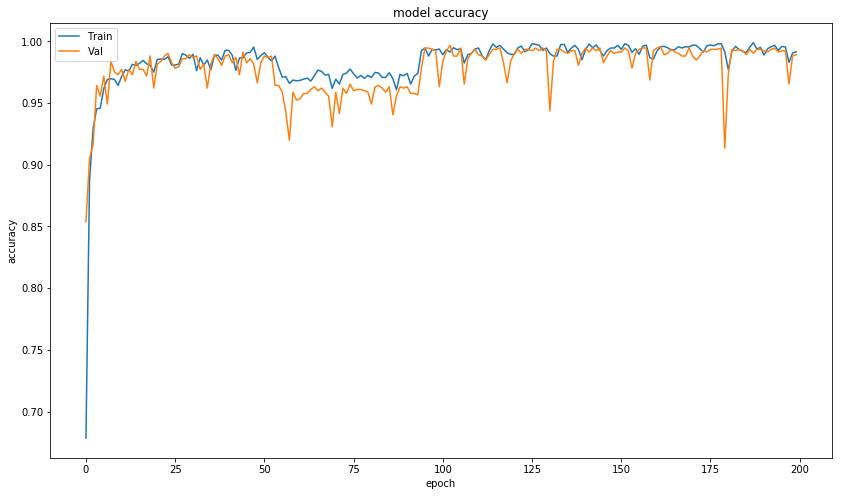

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,8))
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Val')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [104]:
import keras
from keras.regularizers import *
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout
from keras.optimizers import SGD, Adam

y_onehot = keras.utils.to_categorical(y_train)
y_onehot= y_onehot[:,1:]
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled2.shape[1], kernel_initializer='glorot_uniform', activation="relu"))
model.add(Dense(16, kernel_initializer='glorot_uniform',activation="relu"))
model.add(Dropout(0.001))
model.add(Dense(24, kernel_initializer='glorot_uniform',activation="softmax")) 
model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(X_train_scaled2, y_onehot, batch_size=20, epochs=200,verbose=1,validation_split=0.2)

Train on 3696 samples, validate on 924 samples
Epoch 1/200
3696/3696 [==============================] - 4s 990us/step - loss: 1.0983 - acc: 0.6686 - val_loss: 0.4023 - val_acc: 0.8615
Epoch 2/200
3696/3696 [==============================] - 1s 336us/step - loss: 0.2848 - acc: 0.9080 - val_loss: 0.2840 - val_acc: 0.9004
Epoch 3/200
3696/3696 [==============================] - 1s 334us/step - loss: 0.1834 - acc: 0.9453 - val_loss: 0.1593 - val_acc: 0.9556
Epoch 4/200
3696/3696 [==============================] - 1s 341us/step - loss: 0.1545 - acc: 0.9559 - val_loss: 0.1305 - val_acc: 0.9665
Epoch 5/200
3696/3696 [==============================] - 1s 340us/step - loss: 0.1342 - acc: 0.9632 - val_loss: 0.1819 - val_acc: 0.9491
Epoch 6/200
3696/3696 [==============================] - 1s 338us/step - loss: 0.1125 - acc: 0.9700 - val_loss: 0.0996 - val_acc: 0.9827
Epoch 7/200
3696/3696 [==============================] - 1s 336us/step - loss: 0.1171 - acc: 0.9708 - val_loss: 0.1523 - val_acc: 0

3696/3696 [==============================] - 1s 337us/step - loss: 0.0498 - acc: 0.9924 - val_loss: 0.0849 - val_acc: 0.9870
Epoch 61/200
3696/3696 [==============================] - 1s 338us/step - loss: 0.0555 - acc: 0.9919 - val_loss: 0.0811 - val_acc: 0.9859
Epoch 62/200
3696/3696 [==============================] - 1s 333us/step - loss: 0.0667 - acc: 0.9892 - val_loss: 0.0984 - val_acc: 0.9848
Epoch 63/200
3696/3696 [==============================] - 1s 343us/step - loss: 0.0339 - acc: 0.9954 - val_loss: 0.0990 - val_acc: 0.9859
Epoch 64/200
3696/3696 [==============================] - 1s 339us/step - loss: 0.0418 - acc: 0.9922 - val_loss: 0.0661 - val_acc: 0.9924
Epoch 65/200
3696/3696 [==============================] - 1s 339us/step - loss: 0.0396 - acc: 0.9943 - val_loss: 0.2009 - val_acc: 0.9654
Epoch 66/200
3696/3696 [==============================] - 1s 356us/step - loss: 0.0896 - acc: 0.9876 - val_loss: 0.1285 - val_acc: 0.9762
Epoch 67/200
3696/3696 [=======================

3696/3696 [==============================] - 1s 370us/step - loss: 0.0709 - acc: 0.9911 - val_loss: 0.0843 - val_acc: 0.9870
Epoch 120/200
3696/3696 [==============================] - 1s 351us/step - loss: 0.0441 - acc: 0.9946 - val_loss: 0.0683 - val_acc: 0.9903
Epoch 121/200
3696/3696 [==============================] - 1s 334us/step - loss: 0.0303 - acc: 0.9970 - val_loss: 0.0685 - val_acc: 0.9859
Epoch 122/200
3696/3696 [==============================] - 1s 338us/step - loss: 0.0345 - acc: 0.9954 - val_loss: 0.1008 - val_acc: 0.9881
Epoch 123/200
3696/3696 [==============================] - 1s 332us/step - loss: 0.0307 - acc: 0.9957 - val_loss: 0.0894 - val_acc: 0.9892
Epoch 124/200
3696/3696 [==============================] - 1s 331us/step - loss: 0.0931 - acc: 0.9835 - val_loss: 0.1261 - val_acc: 0.9805
Epoch 125/200
3696/3696 [==============================] - 1s 331us/step - loss: 0.0408 - acc: 0.9940 - val_loss: 0.0876 - val_acc: 0.9870
Epoch 126/200
3696/3696 [================

3696/3696 [==============================] - 1s 337us/step - loss: 0.0780 - acc: 0.9924 - val_loss: 0.1890 - val_acc: 0.9827
Epoch 179/200
3696/3696 [==============================] - 1s 335us/step - loss: 0.1291 - acc: 0.9867 - val_loss: 0.2379 - val_acc: 0.9773
Epoch 180/200
3696/3696 [==============================] - 1s 331us/step - loss: 0.1699 - acc: 0.9832 - val_loss: 0.1972 - val_acc: 0.9827
Epoch 181/200
3696/3696 [==============================] - 1s 335us/step - loss: 0.1176 - acc: 0.9889 - val_loss: 0.1951 - val_acc: 0.9816
Epoch 182/200
3696/3696 [==============================] - 1s 340us/step - loss: 0.1919 - acc: 0.9857 - val_loss: 0.3700 - val_acc: 0.9708
Epoch 183/200
3696/3696 [==============================] - 1s 337us/step - loss: 0.2067 - acc: 0.9843 - val_loss: 0.2968 - val_acc: 0.9762
Epoch 184/200
3696/3696 [==============================] - 1s 331us/step - loss: 0.2318 - acc: 0.9811 - val_loss: 0.3095 - val_acc: 0.9773
Epoch 185/200
3696/3696 [================

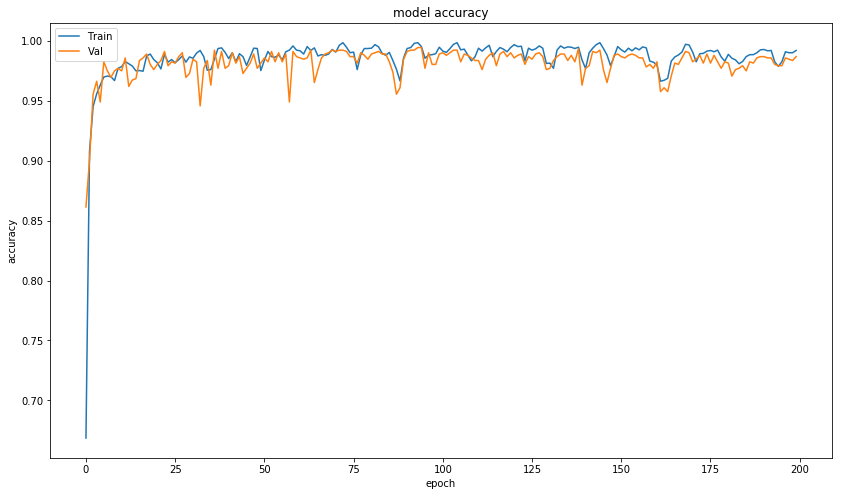

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,8))
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Val')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [106]:
y_onehot = keras.utils.to_categorical(y_train)
y_onehot= y_onehot[:,1:]
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled2.shape[1], kernel_initializer='he_uniform', activation="relu"))
model.add(Dense(16, kernel_initializer='he_uniform',activation="relu"))
model.add(Dropout(0.001))
model.add(Dense(24, kernel_initializer='he_uniform', activation="softmax")) 
model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(X_train_scaled2, y_onehot, batch_size=30, epochs=200,verbose=1,validation_split=0.2)

Train on 3696 samples, validate on 924 samples
Epoch 1/200
3696/3696 [==============================] - 3s 885us/step - loss: 1.4002 - acc: 0.6009 - val_loss: 0.5175 - val_acc: 0.8409
Epoch 2/200
3696/3696 [==============================] - 1s 229us/step - loss: 0.3875 - acc: 0.8753 - val_loss: 0.3079 - val_acc: 0.9188
Epoch 3/200
3696/3696 [==============================] - 1s 225us/step - loss: 0.2374 - acc: 0.9226 - val_loss: 0.2022 - val_acc: 0.9383
Epoch 4/200
3696/3696 [==============================] - 1s 226us/step - loss: 0.1997 - acc: 0.9361 - val_loss: 0.1730 - val_acc: 0.9459
Epoch 5/200
3696/3696 [==============================] - 1s 227us/step - loss: 0.1433 - acc: 0.9581 - val_loss: 0.1469 - val_acc: 0.9621
Epoch 6/200
3696/3696 [==============================] - 1s 229us/step - loss: 0.1272 - acc: 0.9678 - val_loss: 0.1885 - val_acc: 0.9491
Epoch 7/200
3696/3696 [==============================] - 1s 231us/step - loss: 0.1352 - acc: 0.9616 - val_loss: 0.1647 - val_acc: 0

3696/3696 [==============================] - 1s 225us/step - loss: 0.0424 - acc: 0.9919 - val_loss: 0.1074 - val_acc: 0.9784
Epoch 61/200
3696/3696 [==============================] - 1s 226us/step - loss: 0.0626 - acc: 0.9903 - val_loss: 0.0614 - val_acc: 0.9892
Epoch 62/200
3696/3696 [==============================] - 1s 227us/step - loss: 0.0915 - acc: 0.9778 - val_loss: 0.1011 - val_acc: 0.9859
Epoch 63/200
3696/3696 [==============================] - 1s 225us/step - loss: 0.0348 - acc: 0.9938 - val_loss: 0.0812 - val_acc: 0.9881
Epoch 64/200
3696/3696 [==============================] - 1s 225us/step - loss: 0.0502 - acc: 0.9924 - val_loss: 0.1506 - val_acc: 0.9740
Epoch 65/200
3696/3696 [==============================] - 1s 220us/step - loss: 0.1204 - acc: 0.9775 - val_loss: 0.1113 - val_acc: 0.9838
Epoch 66/200
3696/3696 [==============================] - 1s 227us/step - loss: 0.2554 - acc: 0.9659 - val_loss: 0.0860 - val_acc: 0.9805
Epoch 67/200
3696/3696 [=======================

3696/3696 [==============================] - 1s 225us/step - loss: 0.1178 - acc: 0.9835 - val_loss: 0.2217 - val_acc: 0.9719
Epoch 120/200
3696/3696 [==============================] - 1s 224us/step - loss: 0.1146 - acc: 0.9835 - val_loss: 0.1336 - val_acc: 0.9816
Epoch 121/200
3696/3696 [==============================] - 1s 221us/step - loss: 0.0825 - acc: 0.9876 - val_loss: 0.1189 - val_acc: 0.9859
Epoch 122/200
3696/3696 [==============================] - 1s 228us/step - loss: 0.0566 - acc: 0.9938 - val_loss: 0.1086 - val_acc: 0.9870
Epoch 123/200
3696/3696 [==============================] - 1s 224us/step - loss: 0.0546 - acc: 0.9949 - val_loss: 0.1103 - val_acc: 0.9881
Epoch 124/200
3696/3696 [==============================] - 1s 228us/step - loss: 0.0530 - acc: 0.9943 - val_loss: 0.1019 - val_acc: 0.9892
Epoch 125/200
3696/3696 [==============================] - 1s 229us/step - loss: 0.0490 - acc: 0.9954 - val_loss: 0.1232 - val_acc: 0.9859
Epoch 126/200
3696/3696 [================

3696/3696 [==============================] - 1s 226us/step - loss: 0.0580 - acc: 0.9938 - val_loss: 0.1038 - val_acc: 0.9892
Epoch 179/200
3696/3696 [==============================] - 1s 226us/step - loss: 0.0588 - acc: 0.9946 - val_loss: 0.0883 - val_acc: 0.9892
Epoch 180/200
3696/3696 [==============================] - 1s 226us/step - loss: 0.0491 - acc: 0.9962 - val_loss: 0.0954 - val_acc: 0.9892
Epoch 181/200
3696/3696 [==============================] - 1s 229us/step - loss: 0.0572 - acc: 0.9935 - val_loss: 0.1185 - val_acc: 0.9870
Epoch 182/200
3696/3696 [==============================] - 1s 229us/step - loss: 0.0560 - acc: 0.9938 - val_loss: 0.1547 - val_acc: 0.9805
Epoch 183/200
3696/3696 [==============================] - 1s 228us/step - loss: 0.0540 - acc: 0.9940 - val_loss: 0.1296 - val_acc: 0.9859
Epoch 184/200
3696/3696 [==============================] - 1s 228us/step - loss: 0.0793 - acc: 0.9905 - val_loss: 0.1438 - val_acc: 0.9838
Epoch 185/200
3696/3696 [================

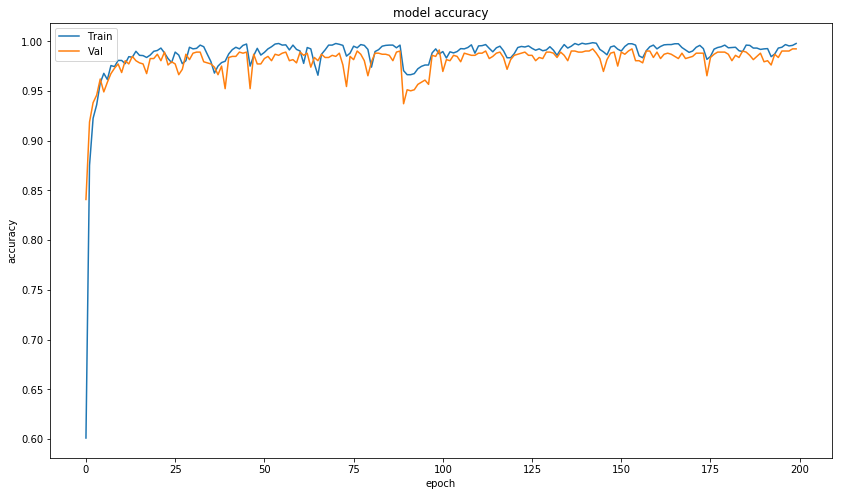

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,8))
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Val')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [110]:
y_onehot = keras.utils.to_categorical(y_train)
y_onehot= y_onehot[:,1:]
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled2.shape[1], kernel_initializer='he_uniform', activation="relu"))
model.add(Dense(16, kernel_initializer='he_uniform',activation="relu"))
model.add(Dropout(0.001))
model.add(Dense(24, kernel_initializer='he_uniform', activation="softmax")) 
model.compile(optimizer=SGD(lr=0.01),loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(X_train_scaled2, y_onehot, batch_size=30, epochs=200,verbose=1,validation_split=0.2)

Train on 3696 samples, validate on 924 samples
Epoch 1/200
3696/3696 [==============================] - 3s 928us/step - loss: 3.2677 - acc: 0.0590 - val_loss: 2.8897 - val_acc: 0.0952
Epoch 2/200
3696/3696 [==============================] - 1s 205us/step - loss: 2.7565 - acc: 0.1258 - val_loss: 2.5851 - val_acc: 0.1775
Epoch 3/200
3696/3696 [==============================] - 1s 201us/step - loss: 2.4808 - acc: 0.2362 - val_loss: 2.3270 - val_acc: 0.2879
Epoch 4/200
3696/3696 [==============================] - 1s 209us/step - loss: 2.2224 - acc: 0.3390 - val_loss: 2.0889 - val_acc: 0.4145
Epoch 5/200
3696/3696 [==============================] - 1s 204us/step - loss: 1.9832 - acc: 0.4608 - val_loss: 1.8738 - val_acc: 0.4924
Epoch 6/200
3696/3696 [==============================] - 1s 206us/step - loss: 1.7720 - acc: 0.5257 - val_loss: 1.6855 - val_acc: 0.5314
Epoch 7/200
3696/3696 [==============================] - 1s 194us/step - loss: 1.5959 - acc: 0.5698 - val_loss: 1.5275 - val_acc: 0

3696/3696 [==============================] - 1s 192us/step - loss: 0.2302 - acc: 0.9297 - val_loss: 0.2512 - val_acc: 0.9188
Epoch 61/200
3696/3696 [==============================] - 1s 185us/step - loss: 0.2204 - acc: 0.9324 - val_loss: 0.2517 - val_acc: 0.9102
Epoch 62/200
3696/3696 [==============================] - 1s 193us/step - loss: 0.2176 - acc: 0.9345 - val_loss: 0.2464 - val_acc: 0.9199
Epoch 63/200
3696/3696 [==============================] - 1s 188us/step - loss: 0.2175 - acc: 0.9343 - val_loss: 0.2427 - val_acc: 0.9188
Epoch 64/200
3696/3696 [==============================] - 1s 193us/step - loss: 0.2154 - acc: 0.9359 - val_loss: 0.2427 - val_acc: 0.9145
Epoch 65/200
3696/3696 [==============================] - 1s 189us/step - loss: 0.2132 - acc: 0.9348 - val_loss: 0.2370 - val_acc: 0.9264
Epoch 66/200
3696/3696 [==============================] - 1s 189us/step - loss: 0.2125 - acc: 0.9351 - val_loss: 0.2372 - val_acc: 0.9210
Epoch 67/200
3696/3696 [=======================

3696/3696 [==============================] - 1s 192us/step - loss: 0.1367 - acc: 0.9637 - val_loss: 0.1541 - val_acc: 0.9545
Epoch 120/200
3696/3696 [==============================] - 1s 187us/step - loss: 0.1346 - acc: 0.9637 - val_loss: 0.1513 - val_acc: 0.9589
Epoch 121/200
3696/3696 [==============================] - 1s 189us/step - loss: 0.1300 - acc: 0.9662 - val_loss: 0.1493 - val_acc: 0.9621
Epoch 122/200
3696/3696 [==============================] - 1s 193us/step - loss: 0.1273 - acc: 0.9640 - val_loss: 0.1470 - val_acc: 0.9632
Epoch 123/200
3696/3696 [==============================] - 1s 190us/step - loss: 0.1326 - acc: 0.9665 - val_loss: 0.1479 - val_acc: 0.9654
Epoch 124/200
3696/3696 [==============================] - 1s 189us/step - loss: 0.1379 - acc: 0.9619 - val_loss: 0.1537 - val_acc: 0.9600
Epoch 125/200
3696/3696 [==============================] - 1s 187us/step - loss: 0.1315 - acc: 0.9640 - val_loss: 0.1487 - val_acc: 0.9675
Epoch 126/200
3696/3696 [================

3696/3696 [==============================] - 1s 187us/step - loss: 0.0990 - acc: 0.9773 - val_loss: 0.1167 - val_acc: 0.9762
Epoch 179/200
3696/3696 [==============================] - 1s 192us/step - loss: 0.1016 - acc: 0.9778 - val_loss: 0.1145 - val_acc: 0.9740
Epoch 180/200
3696/3696 [==============================] - 1s 190us/step - loss: 0.1084 - acc: 0.9735 - val_loss: 0.1151 - val_acc: 0.9762
Epoch 181/200
3696/3696 [==============================] - 1s 188us/step - loss: 0.1066 - acc: 0.9765 - val_loss: 0.1115 - val_acc: 0.9773
Epoch 182/200
3696/3696 [==============================] - 1s 187us/step - loss: 0.0909 - acc: 0.9778 - val_loss: 0.1119 - val_acc: 0.9762
Epoch 183/200
3696/3696 [==============================] - 1s 186us/step - loss: 0.0987 - acc: 0.9778 - val_loss: 0.1130 - val_acc: 0.9751
Epoch 184/200
3696/3696 [==============================] - 1s 185us/step - loss: 0.0987 - acc: 0.9767 - val_loss: 0.1124 - val_acc: 0.9751
Epoch 185/200
3696/3696 [================

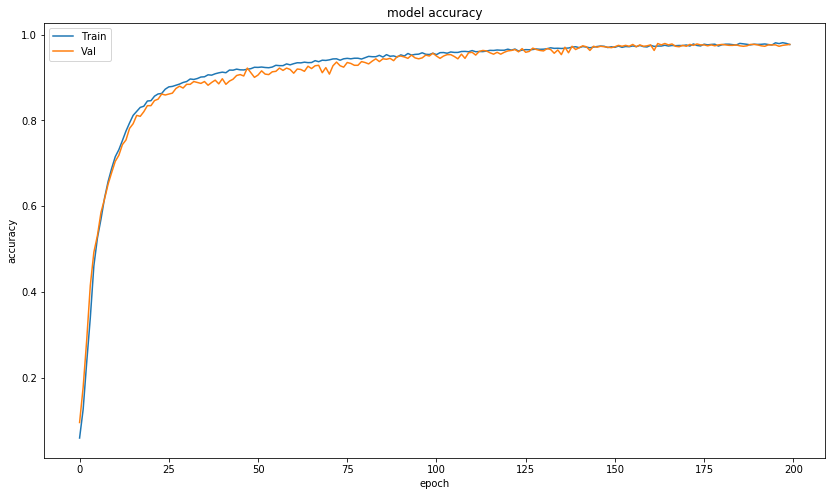

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,8))
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Val')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [112]:
y_onehot = keras.utils.to_categorical(y_train)
y_onehot= y_onehot[:,1:]
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform', activation="relu"))
model.add(Dense(16, kernel_initializer='he_uniform',activation="relu"))
model.add(Dropout(0.01))
model.add(Dense(24, kernel_initializer='he_uniform', activation="softmax")) 
model.compile(optimizer=SGD(lr=0.01),loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(X_train_scaled, y_onehot, batch_size=30, epochs=200,verbose=1,validation_split=0.2)

Train on 3696 samples, validate on 924 samples
Epoch 1/200
3696/3696 [==============================] - 3s 867us/step - loss: 3.0078 - acc: 0.1074 - val_loss: 2.8093 - val_acc: 0.1331
Epoch 2/200
3696/3696 [==============================] - 1s 193us/step - loss: 2.6431 - acc: 0.2089 - val_loss: 2.5160 - val_acc: 0.2478
Epoch 3/200
3696/3696 [==============================] - 1s 191us/step - loss: 2.3959 - acc: 0.3022 - val_loss: 2.2933 - val_acc: 0.3366
Epoch 4/200
3696/3696 [==============================] - 1s 192us/step - loss: 2.1957 - acc: 0.3512 - val_loss: 2.0940 - val_acc: 0.3907
Epoch 5/200
3696/3696 [==============================] - 1s 189us/step - loss: 2.0010 - acc: 0.3948 - val_loss: 1.9065 - val_acc: 0.4177
Epoch 6/200
3696/3696 [==============================] - 1s 187us/step - loss: 1.8212 - acc: 0.4435 - val_loss: 1.7280 - val_acc: 0.4578
Epoch 7/200
3696/3696 [==============================] - 1s 190us/step - loss: 1.6449 - acc: 0.4800 - val_loss: 1.5660 - val_acc: 0

3696/3696 [==============================] - 1s 190us/step - loss: 0.1397 - acc: 0.9713 - val_loss: 0.0859 - val_acc: 0.9892
Epoch 61/200
3696/3696 [==============================] - 1s 184us/step - loss: 0.1370 - acc: 0.9713 - val_loss: 0.0839 - val_acc: 0.9903
Epoch 62/200
3696/3696 [==============================] - 1s 187us/step - loss: 0.1581 - acc: 0.9689 - val_loss: 0.0848 - val_acc: 0.9892
Epoch 63/200
3696/3696 [==============================] - 1s 183us/step - loss: 0.1448 - acc: 0.9678 - val_loss: 0.0819 - val_acc: 0.9892
Epoch 64/200
3696/3696 [==============================] - 1s 187us/step - loss: 0.1434 - acc: 0.9708 - val_loss: 0.0800 - val_acc: 0.9913
Epoch 65/200
3696/3696 [==============================] - 1s 186us/step - loss: 0.1480 - acc: 0.9713 - val_loss: 0.0806 - val_acc: 0.9870
Epoch 66/200
3696/3696 [==============================] - 1s 186us/step - loss: 0.1265 - acc: 0.9713 - val_loss: 0.0752 - val_acc: 0.9924
Epoch 67/200
3696/3696 [=======================

3696/3696 [==============================] - 1s 183us/step - loss: 0.0708 - acc: 0.9843 - val_loss: 0.0300 - val_acc: 0.9989
Epoch 120/200
3696/3696 [==============================] - 1s 186us/step - loss: 0.0685 - acc: 0.9870 - val_loss: 0.0304 - val_acc: 0.9989
Epoch 121/200
3696/3696 [==============================] - 1s 191us/step - loss: 0.0811 - acc: 0.9824 - val_loss: 0.0290 - val_acc: 0.9989
Epoch 122/200
3696/3696 [==============================] - 1s 188us/step - loss: 0.0668 - acc: 0.9881 - val_loss: 0.0293 - val_acc: 0.9989
Epoch 123/200
3696/3696 [==============================] - 1s 187us/step - loss: 0.0686 - acc: 0.9846 - val_loss: 0.0286 - val_acc: 0.9989
Epoch 124/200
3696/3696 [==============================] - 1s 191us/step - loss: 0.0591 - acc: 0.9878 - val_loss: 0.0289 - val_acc: 0.9989
Epoch 125/200
3696/3696 [==============================] - 1s 190us/step - loss: 0.0628 - acc: 0.9881 - val_loss: 0.0286 - val_acc: 0.9989
Epoch 126/200
3696/3696 [================

3696/3696 [==============================] - 1s 191us/step - loss: 0.0464 - acc: 0.9894 - val_loss: 0.0181 - val_acc: 1.0000
Epoch 179/200
3696/3696 [==============================] - 1s 189us/step - loss: 0.0438 - acc: 0.9913 - val_loss: 0.0183 - val_acc: 1.0000
Epoch 180/200
3696/3696 [==============================] - 1s 188us/step - loss: 0.0503 - acc: 0.9873 - val_loss: 0.0175 - val_acc: 1.0000
Epoch 181/200
3696/3696 [==============================] - 1s 188us/step - loss: 0.0525 - acc: 0.9889 - val_loss: 0.0181 - val_acc: 1.0000
Epoch 182/200
3696/3696 [==============================] - 1s 188us/step - loss: 0.0472 - acc: 0.9900 - val_loss: 0.0179 - val_acc: 1.0000
Epoch 183/200
3696/3696 [==============================] - 1s 188us/step - loss: 0.0510 - acc: 0.9886 - val_loss: 0.0182 - val_acc: 0.9989
Epoch 184/200
3696/3696 [==============================] - 1s 187us/step - loss: 0.0483 - acc: 0.9873 - val_loss: 0.0182 - val_acc: 0.9989
Epoch 185/200
3696/3696 [================

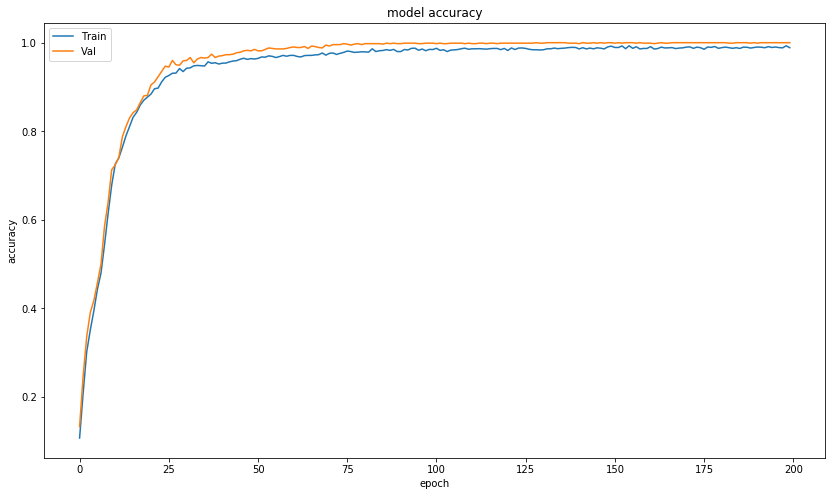

In [113]:
plt.figure(figsize=(14,8))
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Val')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [114]:
from keras.optimizers import SGD, Adam, RMSprop
y_onehot = keras.utils.to_categorical(y_train)
y_onehot= y_onehot[:,1:]
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled2.shape[1],activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.03))
model.add(Dense(24, activation="softmax")) 
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(X_train_scaled2, y_onehot, epochs=200,verbose=1,validation_split=0.2,batch_size=30)

Train on 3696 samples, validate on 924 samples
Epoch 1/200
3696/3696 [==============================] - 4s 953us/step - loss: 2.1686 - acc: 0.4470 - val_loss: 1.2048 - val_acc: 0.7056
Epoch 2/200
3696/3696 [==============================] - 1s 226us/step - loss: 0.8540 - acc: 0.7914 - val_loss: 0.6333 - val_acc: 0.8669
Epoch 3/200
3696/3696 [==============================] - 1s 226us/step - loss: 0.5203 - acc: 0.8669 - val_loss: 0.4351 - val_acc: 0.9037
Epoch 4/200
3696/3696 [==============================] - 1s 226us/step - loss: 0.3847 - acc: 0.8950 - val_loss: 0.3565 - val_acc: 0.9123
Epoch 5/200
3696/3696 [==============================] - 1s 235us/step - loss: 0.3166 - acc: 0.9126 - val_loss: 0.2946 - val_acc: 0.9123
Epoch 6/200
3696/3696 [==============================] - 1s 229us/step - loss: 0.2574 - acc: 0.9302 - val_loss: 0.2428 - val_acc: 0.9351
Epoch 7/200
3696/3696 [==============================] - 1s 237us/step - loss: 0.2236 - acc: 0.9380 - val_loss: 0.2258 - val_acc: 0

3696/3696 [==============================] - 1s 226us/step - loss: 0.0288 - acc: 0.9973 - val_loss: 0.0550 - val_acc: 0.9903
Epoch 61/200
3696/3696 [==============================] - 1s 226us/step - loss: 0.0279 - acc: 0.9981 - val_loss: 0.0503 - val_acc: 0.9913
Epoch 62/200
3696/3696 [==============================] - 1s 226us/step - loss: 0.0321 - acc: 0.9954 - val_loss: 0.0522 - val_acc: 0.9924
Epoch 63/200
3696/3696 [==============================] - 1s 228us/step - loss: 0.0304 - acc: 0.9965 - val_loss: 0.0480 - val_acc: 0.9935
Epoch 64/200
3696/3696 [==============================] - 1s 228us/step - loss: 0.0313 - acc: 0.9962 - val_loss: 0.0517 - val_acc: 0.9913
Epoch 65/200
3696/3696 [==============================] - 1s 235us/step - loss: 0.0271 - acc: 0.9978 - val_loss: 0.0555 - val_acc: 0.9903
Epoch 66/200
3696/3696 [==============================] - 1s 224us/step - loss: 0.0278 - acc: 0.9976 - val_loss: 0.0545 - val_acc: 0.9903
Epoch 67/200
3696/3696 [=======================

3696/3696 [==============================] - 1s 228us/step - loss: 0.0227 - acc: 0.9986 - val_loss: 0.0533 - val_acc: 0.9903
Epoch 120/200
3696/3696 [==============================] - 1s 227us/step - loss: 0.0241 - acc: 0.9976 - val_loss: 0.0559 - val_acc: 0.9903
Epoch 121/200
3696/3696 [==============================] - 1s 225us/step - loss: 0.0235 - acc: 0.9986 - val_loss: 0.0494 - val_acc: 0.9913
Epoch 122/200
3696/3696 [==============================] - 1s 223us/step - loss: 0.0236 - acc: 0.9981 - val_loss: 0.0521 - val_acc: 0.9924
Epoch 123/200
3696/3696 [==============================] - 1s 229us/step - loss: 0.0233 - acc: 0.9984 - val_loss: 0.0519 - val_acc: 0.9913
Epoch 124/200
3696/3696 [==============================] - 1s 223us/step - loss: 0.0289 - acc: 0.9965 - val_loss: 0.0605 - val_acc: 0.9903
Epoch 125/200
3696/3696 [==============================] - 1s 224us/step - loss: 0.0237 - acc: 0.9986 - val_loss: 0.0555 - val_acc: 0.9913
Epoch 126/200
3696/3696 [================

3696/3696 [==============================] - 1s 225us/step - loss: 0.0224 - acc: 0.9986 - val_loss: 0.0542 - val_acc: 0.9913
Epoch 179/200
3696/3696 [==============================] - 1s 230us/step - loss: 0.0222 - acc: 0.9986 - val_loss: 0.0547 - val_acc: 0.9903
Epoch 180/200
3696/3696 [==============================] - 1s 229us/step - loss: 0.0227 - acc: 0.9981 - val_loss: 0.0610 - val_acc: 0.9903
Epoch 181/200
3696/3696 [==============================] - 1s 231us/step - loss: 0.0445 - acc: 0.9968 - val_loss: 0.1006 - val_acc: 0.9870
Epoch 182/200
3696/3696 [==============================] - 1s 229us/step - loss: 0.0470 - acc: 0.9962 - val_loss: 0.1100 - val_acc: 0.9870
Epoch 183/200
3696/3696 [==============================] - 1s 226us/step - loss: 0.0413 - acc: 0.9970 - val_loss: 0.0602 - val_acc: 0.9913
Epoch 184/200
3696/3696 [==============================] - 1s 231us/step - loss: 0.0322 - acc: 0.9946 - val_loss: 0.0602 - val_acc: 0.9892
Epoch 185/200
3696/3696 [================

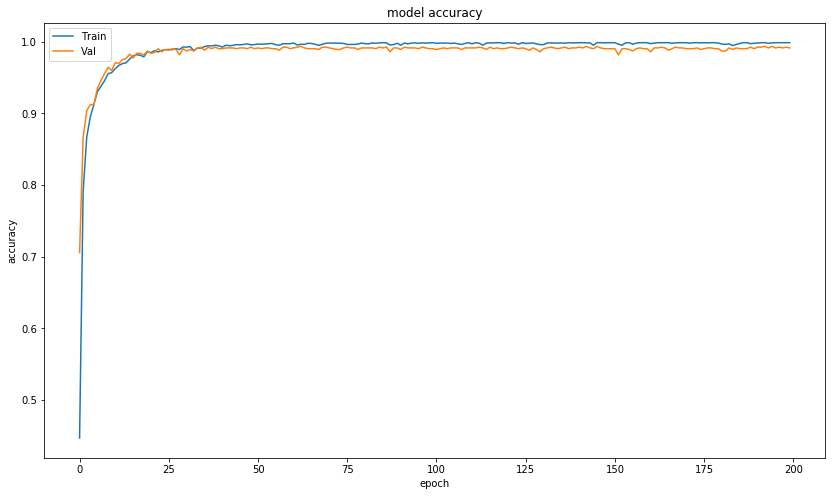

In [115]:
plt.figure(figsize=(14,8))
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Val')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [119]:
y_onetest = keras.utils.to_categorical(y_test)
y_onetest= y_onetest[:,1:]
model.evaluate(X_test_scaled2,y_onetest)

1980/1980 [==============================] - 0s 89us/step


[0.04559396570924707, 0.9919191921600188]

El Mejor! 

model.add(Dense(128, input_dim=X_train_scaled2.shape[1],activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.03))
model.add(Dense(24, activation="softmax")) 
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(X_train_scaled2, y_onehot, epochs=200,verbose=1,validation_split=0.2,batch_size=30)

<a id="refs"></a>
## Referencias
[1] Glorot, X., & Bengio, Y. (2010, March). *Understanding the difficulty of training deep feedforward neural networks*. In Proceedings of the thirteenth international conference on artificial intelligence and statistics (pp. 249-256).    
[2]  He, K., Zhang, X., Ren, S., & Sun, J. (2015). *Delving deep into rectifiers: Surpassing human-level performance on imagenet classification*. In Proceedings of the IEEE international conference on computer vision (pp. 1026-1034).  
[3] Krizhevsky, A., & Hinton, G. (2009). Learning multiple layers of features from tiny images.